# Example_MMS_Polarizationanalysis
Author : Louis RICHARD\
E-Mail : louisr@irfu.se\
Created : 2020-07-27

In [1]:
from pyrfu import pyrf
from pyrfu import mms
from pyrfu import plot as pltrf

import numpy as np

from astropy import constants

import matplotlib.pyplot as plt

###### Time interval

In [2]:
Tint = ["2015-10-30T05:15:42.000","2015-10-30T05:15:54.000"]

###### Spacecraft index

In [3]:
ic = 3

###### Load data

In [4]:
Tintl = pyrf.extend_tint(Tint,[-100,100])
Rxyz = mms.get_data("R_gse",Tintl,ic)

Loading mms3_mec_r_gse...


In [5]:
Bxyz = mms.get_data("B_gse_fgm_brst_l2",Tint,ic)
Exyz = mms.get_data("E_gse_edp_brst_l2",Tint,ic)
Bscm = mms.get_data("B_gse_scm_brst_l2",Tint,ic)

Loading mms3_fgm_b_gse_brst_l2...
Loading mms3_edp_dce_gse_brst_l2...
Loading mms3_scm_acb_gse_scb_brst_l2...


###### Polarization analysis

In [6]:
Me = constants.m_e.value
e = constants.e.value

In [7]:
B_SI = pyrf.norm(Bxyz)*1e-9

In [8]:
Wce = e*B_SI/Me
ecfreq = Wce/(2*np.pi)
ecfreq01 = ecfreq*0.1
ecfreq05 = ecfreq*0.5

In [9]:
polarization = pyrf.ebsp(Exyz,Bscm,Bxyz,Bxyz,Rxyz,[10,4000],fac=True,polarization=True)

/usr/local/lib/python3.7/site-packages/pyrfu/pyrf/ebsp.py:354: UserWarning: Interpolating b and e to 2x e sampling
  warnings.warn("Interpolating b and e to 2x e sampling",UserWarning)


Fs = 16393.44, Fs_e = 8196.72, Fs_b = 8196.72
ebsp ... calculate E and B wavelet transform ... 


100%|██████████| 32/32 [02:01<00:00,  3.79s/it]
/usr/local/lib/python3.7/site-packages/pyrfu/pyrf/ebsp.py:50: RuntimeWarning: Mean of empty slice
  out[i,:] = np.nanmean(data[il:ir,:],axis=0)
/usr/local/lib/python3.7/site-packages/pyrfu/pyrf/ebsp.py:827: ComplexWarning: Casting complex values to real discards the imaginary part
  bb_xxyyzzss         = bb_xxyyzzss.astype(float)
/usr/local/lib/python3.7/site-packages/pyrfu/pyrf/ebsp.py:842: ComplexWarning: Casting complex values to real discards the imaginary part
  power2E_ISR2_plot = power2E_ISR2_plot.astype(float)
/usr/local/lib/python3.7/site-packages/pyrfu/pyrf/ebsp.py:854: ComplexWarning: Casting complex values to real discards the imaginary part
  ee_xxyyzzss         = ee_xxyyzzss.astype(float)
/usr/local/lib/python3.7/site-packages/pyrfu/pyrf/ebsp.py:877: RuntimeWarning: invalid value encountered in less
  indLowPlanarity   = planarity < 0.5
/usr/local/lib/python3.7/site-packages/pyrfu/pyrf/ebsp.py:878: RuntimeWarning: invalid va

In [10]:
frequency 	= polarization["f"]
time 		= polarization["t"]
Bsum 		= polarization["bb_xxyyzzss"][...,3]
Bperp 		= polarization["bb_xxyyzzss"][...,0]+polarization["bb_xxyyzzss"][...,1]
Esum 		= polarization["ee_xxyyzzss"][...,3]
Eperp	 	= polarization["ee_xxyyzzss"][...,0]+polarization["ee_xxyyzzss"][...,1]
ellipticity = polarization["ellipticity"]
dop 		= polarization["dop"]
thetak 	= polarization["k_tp"][...,0]
planarity 	= polarization["planarity"]
pfluxz 		= polarization["pf_xyz"][...,2]/np.linalg.norm(polarization["pf_xyz"],axis=2)

###### Calculate phase speed v_ph = E/B.

In [11]:
vph = np.sqrt(Esum/Bsum)*1e6
vphperp = np.sqrt(Eperp/Bperp)*1e6


###### Remove points with very low B amplitutes


In [12]:
Bsumthres = 1e-7
removepts = Bsum.data < Bsumthres

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


In [13]:
ellipticity.data[removepts] = np.nan
thetak.data[removepts] 		= np.nan
dop.data[removepts] 		= np.nan
planarity.data[removepts]	= np.nan
pfluxz.data[removepts] 		= np.nan
vph.data[removepts] 		= np.nan
vphperp.data[removepts] 	= np.nan

##### Plot

<IPython.core.display.Javascript object>


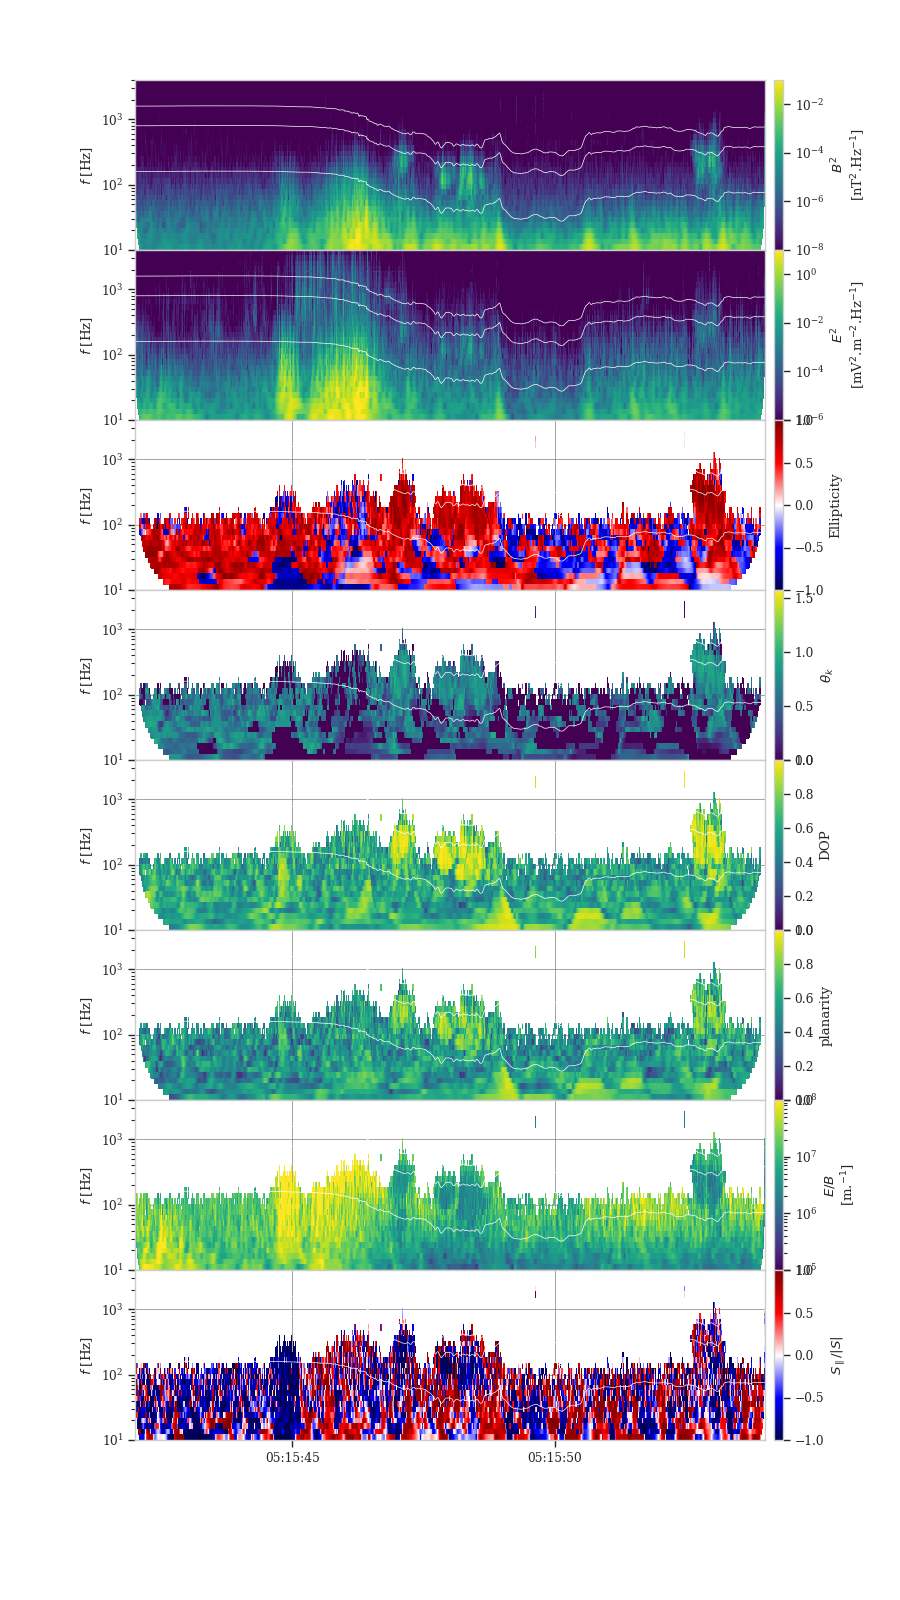

Text(0, 0.5, '$S_\\parallel/|S|$')

In [15]:
%matplotlib notebook
cmap = "viridis"
fig, axs = plt.subplots(8,sharex=True,figsize=(9,16))
fig.subplots_adjust(bottom=0.1,top=0.95,left=0.15,right=0.85,hspace=0)

axs[0], caxs0 = pltrf.plot_spectr(axs[0],Bsum,yscale="log",cscale="log",cmap=cmap,clim=[1e-8,1e-1])
pltrf.plot_line(axs[0],ecfreq,"w")
pltrf.plot_line(axs[0],ecfreq01,"w")
pltrf.plot_line(axs[0],ecfreq05,"w")
axs[0].set_ylabel("$f$ [Hz]")
caxs0.set_ylabel("$B^{2}$"+"\n"+"[nT$^2$.Hz$^{-1}$]")

axs[1], caxs1 = pltrf.plot_spectr(axs[1],Esum,yscale="log",cscale="log",cmap=cmap,clim=[1e-6,1e1])
pltrf.plot_line(axs[1],ecfreq,"w")
pltrf.plot_line(axs[1],ecfreq01,"w")
pltrf.plot_line(axs[1],ecfreq05,"w")
axs[1].set_ylabel("$f$ [Hz]")
caxs1.set_ylabel("$E^{2}$"+"\n"+"[mV$^2$.m$^{-2}$.Hz$^{-1}$]")

axs[2], caxs2 = pltrf.plot_spectr(axs[2],ellipticity,yscale="log",cscale="lin",cmap="seismic",clim=[-1,1])
pltrf.plot_line(axs[2],ecfreq,"w")
pltrf.plot_line(axs[2],ecfreq01,"w")
pltrf.plot_line(axs[2],ecfreq05,"w")
axs[2].set_ylabel("$f$ [Hz]")
caxs2.set_ylabel("Ellipticity")



axs[3], caxs3 = pltrf.plot_spectr(axs[3],ellipticity,yscale="log",cscale="lin",cmap=cmap,clim=[0,np.pi/2])
pltrf.plot_line(axs[3],ecfreq,"w")
pltrf.plot_line(axs[3],ecfreq01,"w")
pltrf.plot_line(axs[3],ecfreq05,"w")
axs[3].set_ylabel("$f$ [Hz]")
caxs3.set_ylabel("$\\theta_{k}$")



axs[4], caxs4 = pltrf.plot_spectr(axs[4],dop,yscale="log",cscale="lin",cmap=cmap,clim=[0,1])
pltrf.plot_line(axs[4],ecfreq,"w")
pltrf.plot_line(axs[4],ecfreq01,"w")
pltrf.plot_line(axs[4],ecfreq05,"w")
axs[4].set_ylabel("$f$ [Hz]")
caxs4.set_ylabel("DOP")



axs[5], caxs5 = pltrf.plot_spectr(axs[5],planarity,yscale="log",cscale="lin",cmap=cmap,clim=[0,1])
pltrf.plot_line(axs[5],ecfreq,"w")
pltrf.plot_line(axs[5],ecfreq01,"w")
pltrf.plot_line(axs[5],ecfreq05,"w")
axs[5].set_ylabel("$f$ [Hz]")
caxs5.set_ylabel("planarity")


axs[6], caxs6 = pltrf.plot_spectr(axs[6],vph,yscale="log",cscale="log",cmap=cmap,clim=[1e5,1e8])
pltrf.plot_line(axs[6],ecfreq,"w")
pltrf.plot_line(axs[6],ecfreq01,"w")
pltrf.plot_line(axs[6],ecfreq05,"w")
axs[6].set_ylabel("$f$ [Hz]")
caxs6.set_ylabel("$E/B$"+"\n"+"[m.$^{-1}$]")

axs[7], caxs7 = pltrf.plot_spectr(axs[7],pfluxz,yscale="log",cscale="lin",cmap="seismic",clim=[-1,1])
pltrf.plot_line(axs[7],ecfreq,"w")
pltrf.plot_line(axs[7],ecfreq01,"w")
pltrf.plot_line(axs[7],ecfreq05,"w")
axs[7].set_ylabel("$f$ [Hz]")
caxs7.set_ylabel("$S_\\parallel/|S|$")